#### Binary classification in keras 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### read the train dataset

In [2]:
import pandas as pd
df = pd.read_csv('train_smoker.csv')
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

### check the missing values of dataset 

In [4]:
df.isna().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

### seprate x and y (smoking)

In [5]:
x =df.drop(columns=['id', 'smoking'])
y =df[['smoking']]

In [6]:
x.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,300,40,75,16.5,1,1.0,22,25,27,0
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,55,57,126,16.2,1,1.1,27,23,37,1
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,197,45,93,17.4,1,0.8,27,31,53,0
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,203,38,102,15.9,1,1.0,20,27,30,1
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,87,44,93,15.4,1,0.8,19,13,17,0


In [7]:
y.head()

,smoking
0,1
1,0
2,1
3,0
4,1


In [8]:
y.value_counts()

smoking
0          89603
1          69653
Name: count, dtype: int64

#### preprossing x with pipline 

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe =Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                         ('scaler', StandardScaler())])

In [11]:
x_pre =num_pipe.fit_transform(x)
x_pre

array([[ 0.90298511, -0.03026766, -0.56758078, ..., -0.08732581,
        -0.29534174, -0.49686626],
       [ 2.16963644, -0.03026766, -0.17031899, ..., -0.19998274,
         0.0251244 ,  2.01261403],
       [-2.05253466,  0.53669377,  0.62420461, ...,  0.25064496,
         0.53787023, -0.49686626],
       ...,
       [-0.36366622, -0.59722908, -1.36210438, ..., -0.98858121,
        -0.77604095, -0.49686626],
       [ 0.480768  , -0.03026766,  0.62420461, ..., -0.53795351,
         0.0251244 , -0.49686626],
       [-0.36366622, -2.29811335, -1.75936618, ..., -0.59428197,
        -0.61580788, -0.49686626]])

In [12]:
cols =num_pipe.get_feature_names_out()
cols

array(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine',
       'AST', 'ALT', 'Gtp', 'dental caries'], dtype=object)

In [13]:
x_pre =pd.DataFrame(x_pre, columns=cols)
x_pre.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,0.902985,-0.030268,-0.567581,-0.223489,-1.257856,-1.022156,-0.156725,-0.154865,0.981702,1.125777,...,2.604429,-1.135246,-1.406581,1.189928,-0.213401,0.597927,-0.371570,-0.087326,-0.295342,-0.496866
1,2.169636,-0.030268,-0.170319,0.669577,-1.009169,-0.767247,6.380587,6.457242,1.845852,0.681066,...,-1.097105,0.082162,0.404573,0.980315,-0.213401,1.155511,0.156700,-0.199983,0.025124,2.012614
2,-2.052535,0.536694,0.624205,-0.223489,-1.506543,-1.277064,-0.156725,-0.154865,-0.353802,-0.208355,...,1.048274,-0.777185,-0.767350,1.818767,-0.213401,-0.517239,0.156700,0.250645,0.537870,-0.496866
3,-0.785883,1.670617,2.213252,2.455708,1.229017,0.507296,-0.156725,-0.154865,0.667465,1.236955,...,1.138923,-1.278470,-0.447734,0.770702,-0.213401,0.597927,-0.582878,0.025331,-0.199202,2.012614
4,-1.208100,-0.030268,-0.567581,-0.279305,1.229017,-0.002521,-0.156725,-0.154865,-0.118125,-0.097177,...,-0.613639,-0.848797,-0.767350,0.421347,-0.213401,-0.517239,-0.688532,-0.763267,-0.615808,-0.496866


#### apply train test split 

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain ,ytest = train_test_split(x_pre, y ,test_size=0.2, random_state=42)

In [15]:
xtrain.shape

(127404, 22)

In [16]:
xtest.shape

(31852, 22)

### create a neural network wirh keras 

In [17]:
from keras.models import Sequential
from keras.layers import Dense , Dropout


#### dropout layer is act as regulrization .randomly drop some percentage of neurons  

In [18]:
xtrain.shape[1]

22

In [19]:
model = Sequential()
##hidden layer 1
model.add(Dense(64, activation='relu',input_dim= xtrain.shape[1]))
## dropout layer 1
model.add(Dropout(0.2))
## hidden layer 2
model.add(Dense(32, activation='relu'))
## dropout layer 2
model.add(Dropout(0.2))
##output layer 
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1472      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3585 (14.00 KB)
Trainable params: 3585 (14.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### complie thye model 

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

#### fit the model 

In [22]:
hist = model.fit( xtrain ,ytrain , validation_split=0.2, epochs=60)

Epoch 1/60
3186/3186 [==============================] - 16s 4ms/step - loss: 0.4826 - accuracy: 0.7566 - auc: 0.8367 - val_loss: 0.4580 - val_accuracy: 0.7725 - val_auc: 0.8552
Epoch 2/60
3186/3186 [==============================] - 18s 6ms/step - loss: 0.4672 - accuracy: 0.7680 - auc: 0.8486 - val_loss: 0.4548 - val_accuracy: 0.7737 - val_auc: 0.8577
Epoch 3/60
3186/3186 [==============================] - 16s 5ms/step - loss: 0.4642 - accuracy: 0.7698 - auc: 0.8509 - val_loss: 0.4526 - val_accuracy: 0.7745 - val_auc: 0.8587
Epoch 4/60
3186/3186 [==============================] - 16s 5ms/step - loss: 0.4610 - accuracy: 0.7710 - auc: 0.8530 - val_loss: 0.4507 - val_accuracy: 0.7763 - val_auc: 0.8600
Epoch 5/60
3186/3186 [==============================] - 14s 5ms/step - loss: 0.4601 - accuracy: 0.7733 - auc: 0.8537 - val_loss: 0.4512 - val_accuracy: 0.7777 - val_auc: 0.8607
Epoch 6/60
3186/3186 [==============================] - 15s 5ms/step - loss: 0.4598 - accuracy: 0.7723 - auc: 0.854

#### plot the learning cruve 

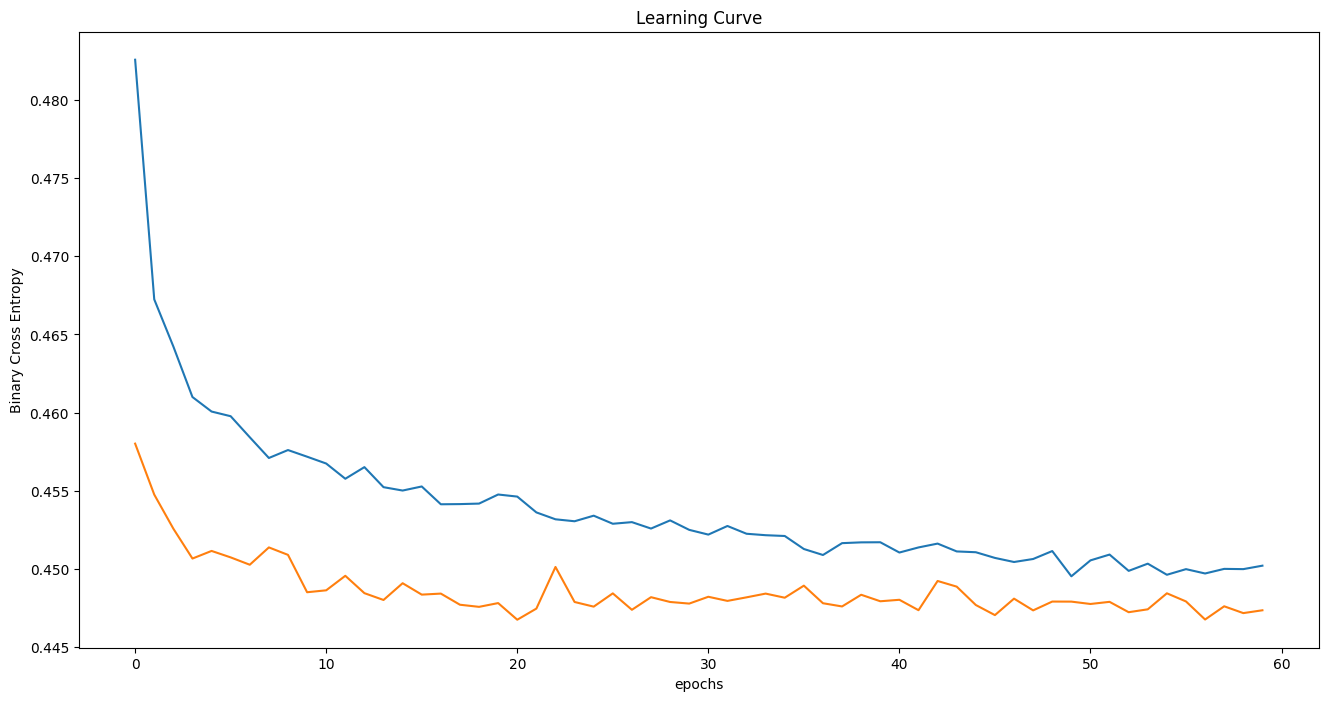

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'], label='Train BCE')
plt.plot(hist.history['val_loss'], label='Test BCE')
plt.xlabel('epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Learning Curve')
plt.show()

### Evaluate model on train and test

In [24]:
model.evaluate(xtrain, ytrain)

3982/3982 [==============================] - 9s 2ms/step - loss: 0.4415 - accuracy: 0.7836 - auc: 0.8674


[0.44146737456321716, 0.7836174964904785, 0.8674148321151733]

In [25]:
model.evaluate(xtest, ytest)

 40/996 [>.............................] - ETA: 2s - loss: 0.4577 - accuracy: 0.7844 - auc: 0.8577

996/996 [==============================] - 2s 2ms/step - loss: 0.4569 - accuracy: 0.7722 - auc: 0.8554


[0.4569018483161926, 0.7721964120864868, 0.8553863763809204]

#### Predicting train and test

In [26]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

996/996 [==============================] - 3s 3ms/step


In [27]:
yprob_tr[0:5]

array([[0.00163437],
       [0.30691746],
       [0.03936624],
       [0.12902519],
       [0.4538042 ]], dtype=float32)

### Predicting the results
threshold = 0.5

if prob>=0.5 then smoker else non_smoker

In [28]:
ypred_tr = [1 if i>=0.5 else 0 for i in yprob_tr]
ypred_ts = [1 if i>=0.5 else 0 for i in yprob_ts]

In [29]:
ypred_tr[0:5]

[0, 0, 0, 0, 0]

In [30]:
ypred_ts[0:5]

[1, 1, 1, 0, 1]

### Create confusion matrix for test results

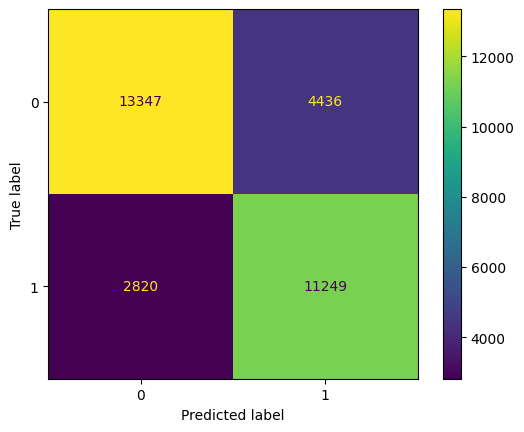

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Classification report

In [32]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79     17783
           1       0.72      0.80      0.76     14069

    accuracy                           0.77     31852
   macro avg       0.77      0.78      0.77     31852
weighted avg       0.78      0.77      0.77     31852



#### Save the model in .keras format

In [33]:
model.save('SmokerClassification.keras')

#### Predicting resutlts for test_smoker.csv file


In [34]:
xnew = pd.read_csv('test_smoker.csv')
xnew.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


In [35]:
xnew2 = xnew.drop(columns=['id'])
xnew2

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,165,70,84.0,1.2,1.2,1,1,130,89,...,186,49,115,14.2,1,0.9,19,25,32,0
1,80,160,60,93.0,1.0,1.0,2,2,144,72,...,158,35,104,13.0,1,1.1,20,12,24,0
2,60,170,70,86.5,0.6,0.7,1,1,117,75,...,173,39,88,15.4,1,1.4,38,60,36,0
3,40,160,50,67.0,0.3,0.4,1,1,116,62,...,47,75,128,14.5,1,0.6,25,18,10,1
4,40,170,75,89.4,1.0,0.9,1,1,132,94,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,40,165,60,78.0,0.8,0.9,1,1,112,78,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,40,170,85,95.0,1.2,1.2,1,1,130,90,...,186,44,100,16.0,2,1.0,25,31,38,0
106168,35,170,85,89.0,1.2,1.2,1,1,131,86,...,76,53,142,15.9,1,0.8,33,32,24,1
106169,40,160,60,67.0,0.7,0.8,1,1,120,80,...,81,55,103,13.9,1,0.6,42,36,32,0


### For new predictions always apply .transform


In [36]:
xnew2_pre = num_pipe.transform(xnew2)
xnew2_pre

array([[-0.36366622, -0.03026766,  0.22694281, ..., -0.08732581,
        -0.13510867, -0.49686626],
       [ 3.01407065, -0.59722908, -0.56758078, ..., -0.81959582,
        -0.39148158, -0.49686626],
       [ 1.32520222,  0.53669377,  0.22694281, ...,  1.88417036,
        -0.00692221, -0.49686626],
       ...,
       [-0.78588333,  0.53669377,  1.4187282 , ...,  0.30697342,
        -0.39148158,  2.01261403],
       [-0.36366622, -0.59722908, -0.56758078, ...,  0.53228727,
        -0.13510867, -0.49686626],
       [ 0.480768  , -1.73115193, -1.36210438, ..., -0.87592428,
        -0.61580788,  2.01261403]])

In [37]:
xnew2_pre = pd.DataFrame(xnew2_pre, columns=cols)
xnew2_pre.head()


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,-0.363666,-0.030268,0.226943,0.111411,0.482955,0.507296,-0.156725,-0.154865,0.588906,1.348132,...,0.882082,-0.490736,0.013932,-0.417106,-0.213401,0.040344,-0.688532,-0.087326,-0.135109,-0.496866
1,3.014071,-0.597229,-0.567581,1.116110,-0.014419,-0.002521,6.380587,6.457242,1.688733,-0.541888,...,0.459050,-1.493307,-0.376709,-1.255558,-0.213401,1.155511,-0.582878,-0.819596,-0.391482,-0.496866
2,1.325202,0.536694,0.226943,0.390494,-1.009169,-0.767247,-0.156725,-0.154865,-0.432361,-0.208355,...,0.685674,-1.206858,-0.944914,0.421347,-0.213401,2.828261,1.318895,1.884170,-0.006922,-0.496866
3,-0.363666,-0.597229,-1.362104,-1.786353,-1.755231,-1.531973,-0.156725,-0.154865,-0.510921,-1.653664,...,-1.217971,1.371182,0.475599,-0.207493,-0.213401,-1.632406,-0.054608,-0.481625,-0.840134,2.012614
4,-0.363666,0.536694,0.624205,0.714230,-0.014419,-0.257430,-0.156725,-0.154865,0.746025,1.904021,...,-0.417232,-1.206858,0.298035,1.189928,-0.213401,0.597927,0.473663,0.701273,-0.295342,2.012614


### Get the probabilities for prediction

In [38]:
prob = model.predict(xnew2_pre)

3318/3318 [==============================] - 9s 3ms/step


In [39]:
prob

array([[0.47374502],
       [0.3029705 ],
       [0.46341196],
       ...,
       [0.43052375],
       [0.15423174],
       [0.02215913]], dtype=float32)

In [40]:
pred = [1 if i>=0.5 else 0 for i in prob]

In [41]:
pred[0:5]

[0, 0, 0, 0, 1]

#### Save the values in dataframe

In [42]:
df_final = xnew[['id']]
df_final

,id
0,159256
1,159257
2,159258
3,159259
4,159260
...,...
106166,265422
106167,265423
106168,265424
106169,265425


In [43]:
df_final['smoker_pred']=pred
df_final['smoker_prob']=prob

In [44]:
df_final

,id,smoker_pred,smoker_prob
0,159256,0,0.473745
1,159257,0,0.302970
2,159258,0,0.463412
3,159259,0,0.025164
4,159260,1,0.621258
...,...,...,...
106166,265422,1,0.588974
106167,265423,1,0.699063
106168,265424,0,0.430524
106169,265425,0,0.154232


In [45]:
df_final['smoker_pred'].value_counts()

smoker_pred
0    54363
1    51808
Name: count, dtype: int64

<Axes: xlabel='smoker_pred'>

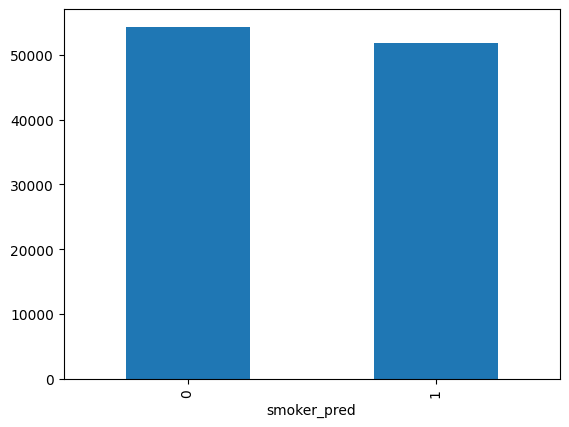

In [46]:
df_final['smoker_pred'].value_counts().plot(kind='bar')

In [47]:
df_final.to_csv('Results.csv', index=False)